In [1]:
pip install statannotations

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Jeff\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import scipy as sp
import scikit_posthocs as sk
import tkinter as tk
from statsmodels.formula.api import ols
from tkinter.filedialog import askopenfilename
from statsmodels.formula.api import ols
from bioinfokit.analys import stat
from statannotations.Annotator import Annotator
#from statannotations.Annotator import add_stat_annotation

# Run this at the beginning before averaging repeats

In [3]:
#empty array of the experimental repeats
percentRepeats = {}
normalizedpercentRepeats = {}

intensityRepeats = {}
normalizedintensityRepeats = {}

positiveintensityRepeats = {}
normalizedpositiveintensityRepeats = {}

normalizedintensityGmeanRepeats = {}
intensityGmeanRepeats = {}

normalizedintensityMeanRepeats = {}
intensityMeanRepeats = {}

In [20]:
#opens file selection dialog
filename = askopenfilename()
dataOut = pd.read_csv(filename, keep_default_na=False)
dataOut

,ImageNumber,ObjectNumber,Metadata_Color,Metadata_Concentration,Metadata_Cotreatment,Metadata_CotreatmentConcentration,Metadata_Date,Metadata_FileLocation,Metadata_Frame,Metadata_ImageNumber,...,Intensity_MinIntensityEdge_mCherry,Intensity_MinIntensity_GFP,Intensity_MinIntensity_mCherry,Intensity_StdIntensityEdge_GFP,Intensity_StdIntensityEdge_mCherry,Intensity_StdIntensity_GFP,Intensity_StdIntensity_mCherry,Intensity_UpperQuartileIntensity_GFP,Intensity_UpperQuartileIntensity_mCherry,Math_Ratio
0,1,1,nan,0,Control,NA,202209022,nan,0,1,...,0.000000,0.0,0.000000,0.000000,0.065401,0.001393,0.122826,0.000000,0.361765,0.000828
1,1,2,nan,0,Control,NA,202209022,nan,0,1,...,0.000000,0.0,0.000000,0.009702,0.128576,0.033583,0.372204,0.062745,1.000000,0.059056
2,1,3,nan,0,Control,NA,202209022,nan,0,1,...,0.000000,0.0,0.000000,0.004016,0.124335,0.007964,0.156246,0.005882,0.450980,0.013174
3,1,4,nan,0,Control,NA,202209022,nan,0,1,...,0.113725,0.0,0.098039,0.007100,0.040902,0.008527,0.068657,0.003922,0.274510,0.018000
4,1,5,nan,0,Control,NA,202209022,nan,0,1,...,0.000000,0.0,0.000000,0.006708,0.071677,0.007358,0.177558,0.000000,0.576471,0.005786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,16,22,nan,100,R9(1-1),100,202209022,nan,0,9,...,0.000000,0.0,0.000000,0.000000,0.139900,0.000000,0.241651,0.000000,0.650000,0.000000
358,16,23,nan,100,R9(1-1),100,202209022,nan,0,9,...,0.000000,0.0,0.000000,0.005591,0.048496,0.010351,0.061278,0.007843,0.278431,0.024263
359,16,24,nan,100,R9(1-1),100,202209022,nan,0,9,...,0.000000,0.0,0.000000,0.003888,0.101317,0.021930,0.355107,0.039216,1.000000,0.030335
360,16,25,nan,100,R9(1-1),100,202209022,nan,0,9,...,0.000000,0.0,0.000000,0.001768,0.132039,0.025044,0.363122,0.039216,1.000000,0.024244


In [21]:
#define the metadata tag that groups the data for an experimental run
# metadataname ='Metadata_Treatment'
# metadataname = 'Metadata_Concentration'
metadataname = 'Metadata_Cotreatment'

#counts the number of groups made based on the tag. make sure this matches expectation
groups = dataOut[metadataname].value_counts(sort = False,dropna = False)
uniqueorder= dataOut[metadataname].unique()

print(groups)

Control     91
R9(1-1)    104
R9(3-1)     69
NA          98
Name: Metadata_Cotreatment, dtype: int64


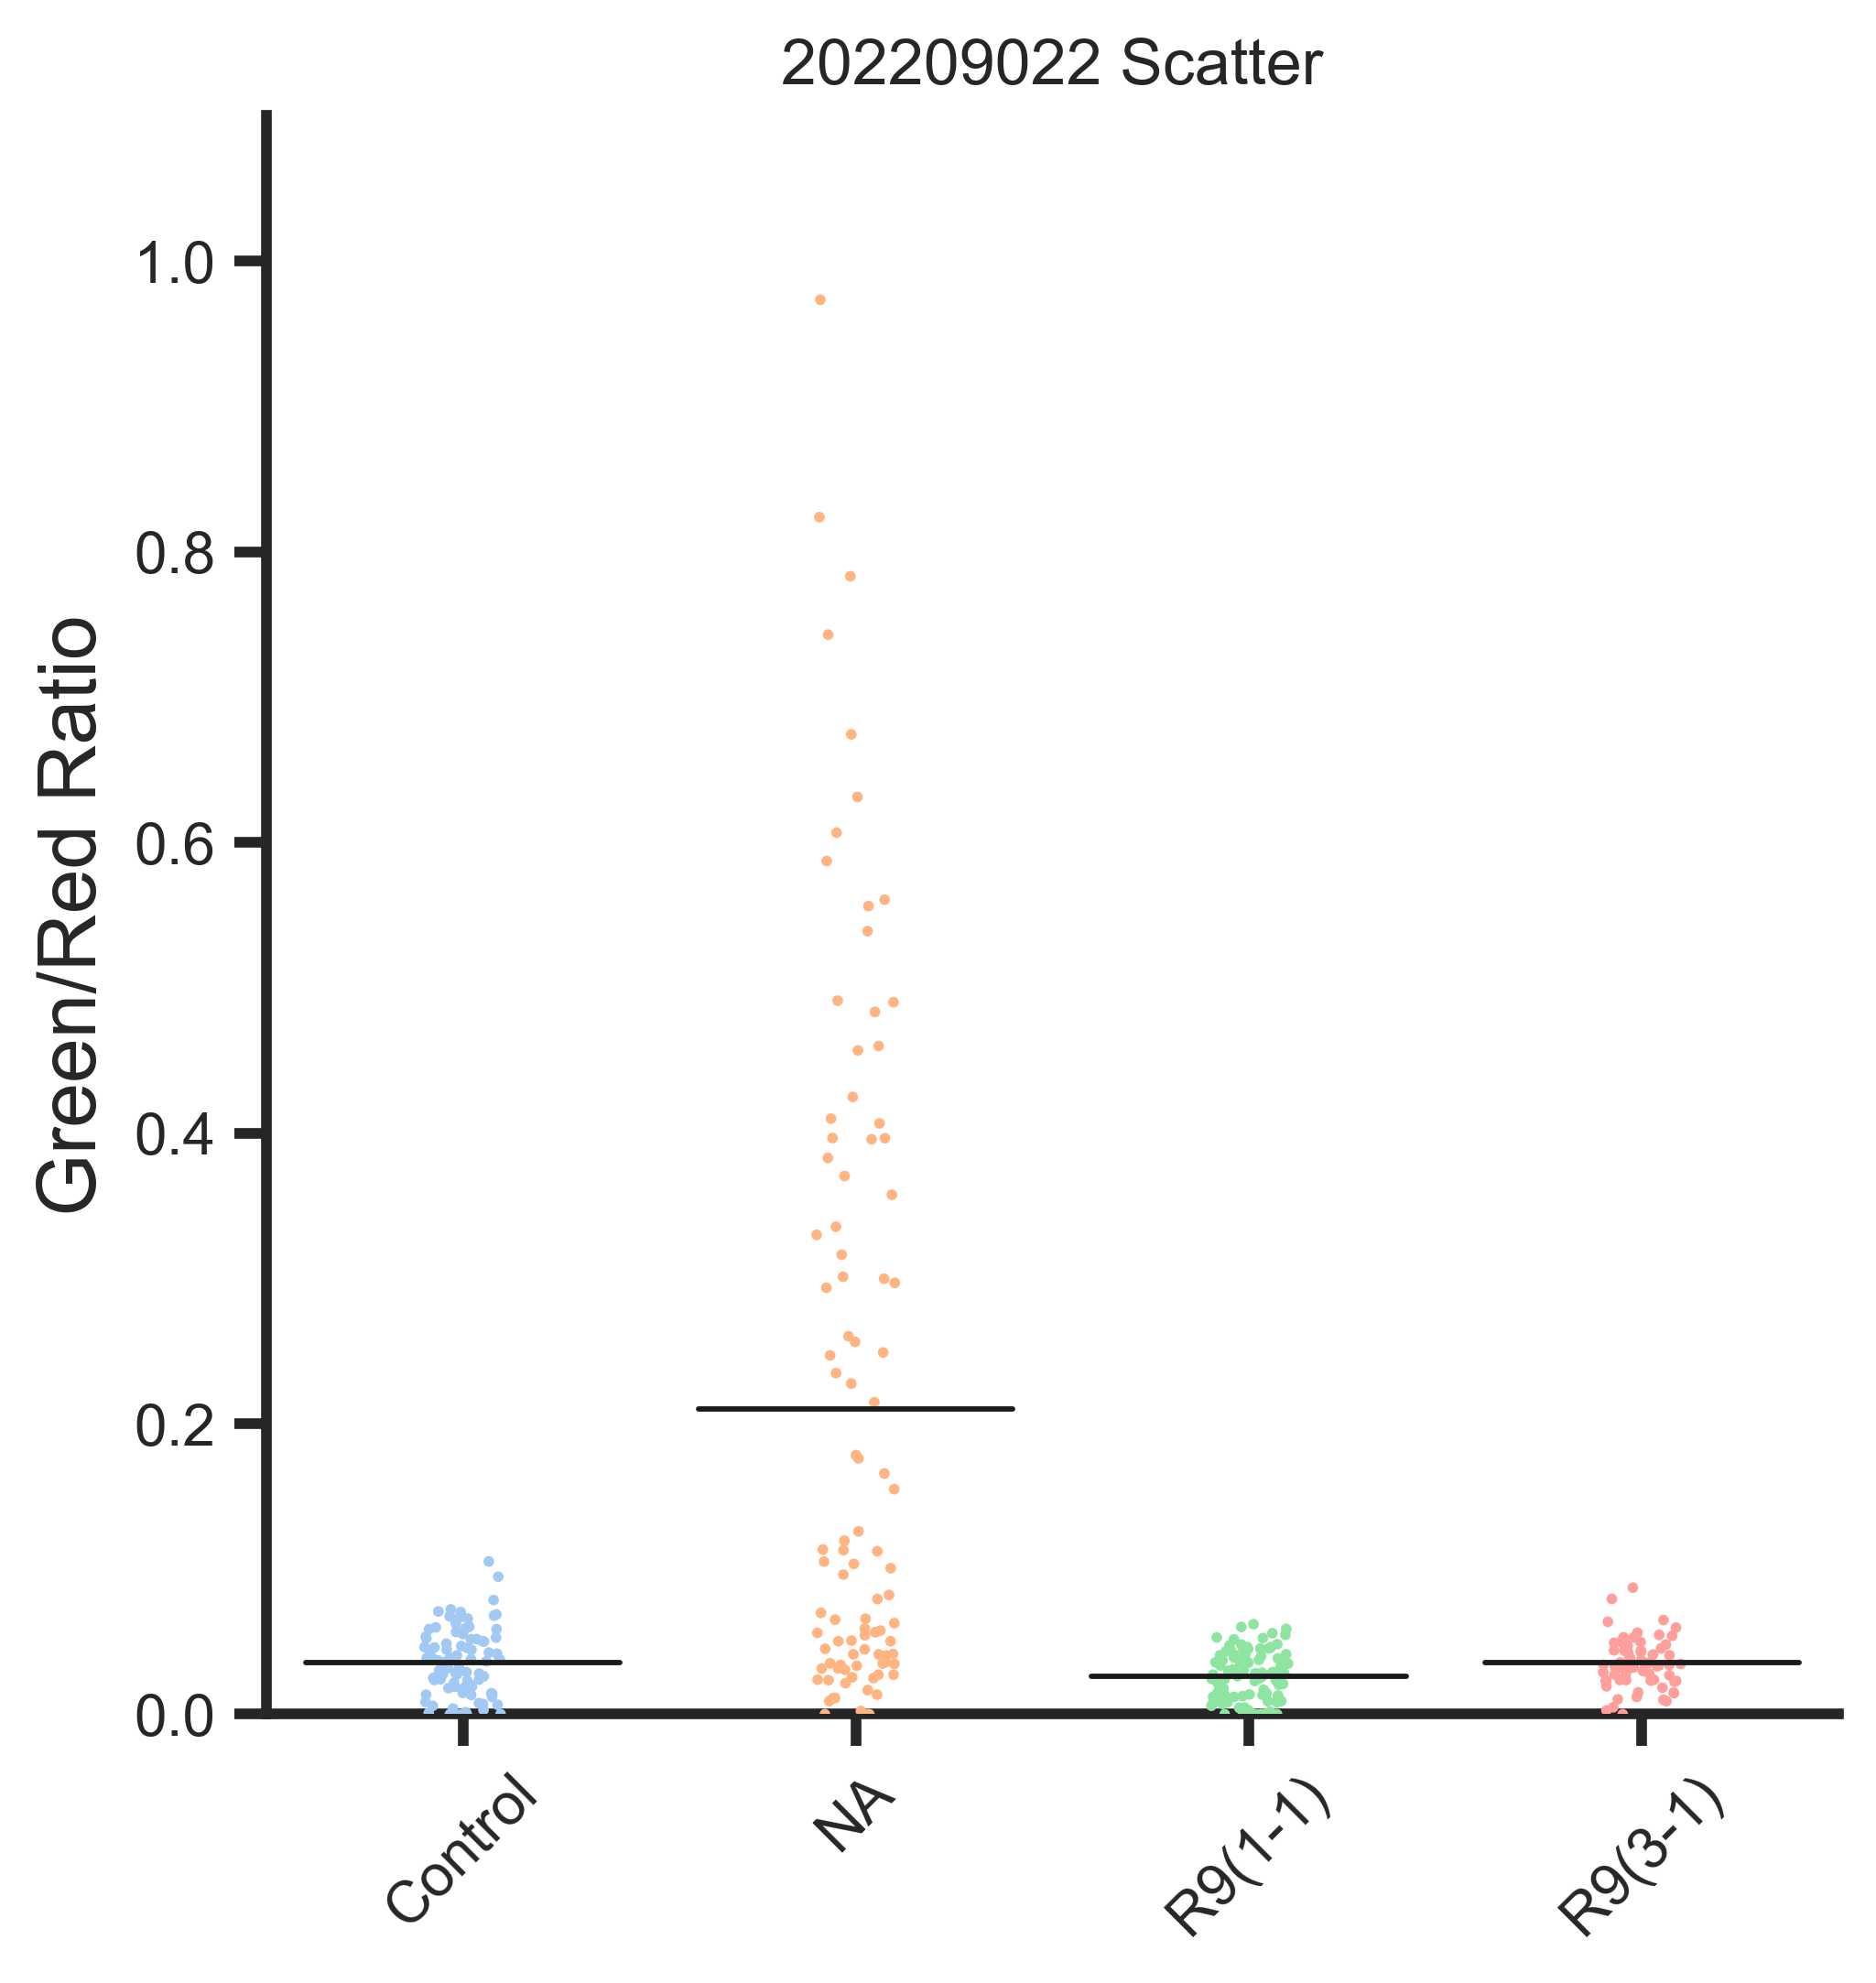

In [22]:


#Define the data to be plotted and the order for plotting
# axorder = [0,10,20,50,100]
# axorder = [0,100,300,500,1000]
# axorder = ['DMSO', 'Chloroquine','Control']
# axorder = ['Control', 'DMSO','Wortmannin','Ikarugamycin','Pyrenebutyrate','Chloroquine']
# axorder = ['Control','GFP11','BP100GFP11','TATGFP11','R9GFP11']    
# axorder = ['Control','DMSO','Chloroquine','NA','4C'] 
# axorder = ['Control','4Hattached','4HRechallenge','24Hattached']
axorder = ['Control','NA','R9(1-1)','R9(3-1)'] 
# axorder = ['Control', 'GFP11WUSR9']
# axorder = ['Control','NA','4C'] 

#set the theme
sns.set_style("ticks")
#scatter plot
ax = sns.catplot(x=metadataname, y='Math_Ratio',kind ='strip', order = axorder,s= 2, ci='sd',data=dataOut, palette = 'pastel')
#define the y-axis
ax.set(ylim=(0,1.1))
#add the mean as a horizontal line
ax2 = sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 1},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x=metadataname,
            y='Math_Ratio',
            data=dataOut,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order = axorder)


#get info to prepare the title and filename
date = str(dataOut['Metadata_Date'][1])
projection = dataOut['Metadata_Projection'][1]

Ngroups = groups
Ngroups.index =Ngroups.index.map(str)



sns.set(font_scale = 1)
plt.xticks(rotation =45)
savename = date +' Scatter' 
plt.title(savename)
plt.ylabel('Green/Red Ratio', fontsize = 15)
plt.xlabel('')

#aesthetics 
sns.set_style("ticks")
ax2.spines['left'].set_linewidth(2)
ax2.spines['bottom'].set_linewidth(2)
ax2.xaxis.set_tick_params(width =2)
ax2.yaxis.set_tick_params(width =2)
plt.rcParams['figure.dpi'] = 420
if metadataname == 'Metadata_Concentration':
    plt.xlabel('[R9-GFP11] μM', fontsize = 15)



In [23]:
#save the raw, trimmed data as csv
dataRatios= dataOut[['Metadata_Date','Math_Ratio', 'Metadata_Concentration','Metadata_Treatment','Metadata_Cotreatment','Metadata_CotreatmentConcentration']]
# dataRatios= dataOut[['Metadata_Date','Math_Ratio', 'Metadata_Concentration','Metadata_Treatment']]

dataRatios= dataRatios.sort_values(by = [metadataname])
dataRatios.to_csv('G:/My Drive/Good Imaging Data/CSV/' + date +'.csv' )


G:/My Drive/Good Imaging Data/Non Covalent Delivery/202209022/Z Slices/thresholdProjNuclei.csv
     Metadata_Date  Math_Ratio  Metadata_Concentration Metadata_Treatment  \
0        202209022    0.000828                       0            Control   
205      202209022    0.035574                       0            Control   
204      202209022    0.028712                       0            Control   
203      202209022    0.042434                       0            Control   
202      202209022    0.023833                       0            Control   
..             ...         ...                     ...                ...   
168      202209022    0.049892                     100              GFP11   
138      202209022    0.018260                     100              GFP11   
139      202209022    0.023738                     100              GFP11   
167      202209022    0.022888                     100              GFP11   
137      202209022    0.026853                     100    

In [24]:
#get the mean and stdev of each group
dataMean = dataOut.groupby(metadataname).mean()
dataMedian = dataOut.groupby(metadataname).median()
dataOut['Math_Ratio+1'] = dataOut.groupby(metadataname)['Math_Ratio'].apply(lambda x: x+1)
dataOutGrouped= dataOut.groupby(metadataname)['Math_Ratio+1'].apply(sp.stats.gmean)
dataOutGrouped = dataOutGrouped-1
dataGmean = dataOutGrouped


dataSD = dataOut.groupby(metadataname).std()


#define the control group
control = 'Control'
# control = 0



#define a 1-tailed 95% CI from the SD. 99% is 2.326 (95% is 1.96 for two tails and ~98% for 1 tailed, 1.645 is 1 tailed 95%)
sD= dataSD.loc[control,'Math_Ratio']
mean =dataMean.loc[control,'Math_Ratio'] 
cutoff = sD*1.96 + dataMean.loc[control,'Math_Ratio'] 


#counts the number of positive nuclei
positive=dataOut.loc[dataOut['Math_Ratio'] > cutoff][metadataname].value_counts(sort = False, dropna = False).reindex(
    dataOut[metadataname].unique(), fill_value=0)


#what to normalize by?
normval = 'NA'
#get the median ratio
intensity = dataMedian['Math_Ratio']
normalizedintensity = intensity/intensity.loc[normval]


#Mean Ratio
intensityMean = dataMean['Math_Ratio']
normalizedintensityMean = intensityMean/intensityMean.loc[normval]


#% Positive
percent = positive.div(groups.values)*100
percent = percent.fillna(0)
normalizedpercent = {}
normalizedpercent = percent/percent.loc[normval]



0.0355416101456372
0.022943889330734577
0.08051163323387697
percent
Control     2.197802
R9(1-1)     0.000000
R9(3-1)     1.449275
NA         54.081633
Name: Metadata_Cotreatment, dtype: float64
Mean
Metadata_Cotreatment
Control    0.035542
NA         0.210378
R9(1-1)    0.025945
R9(3-1)    0.035354
Name: Math_Ratio, dtype: float64
Gmean
Metadata_Cotreatment
Control    0.035292
NA         0.192144
R9(1-1)    0.025802
R9(3-1)    0.035215
Name: Math_Ratio+1, dtype: float64
median
Metadata_Cotreatment
Control    0.036455
NA         0.104235
R9(1-1)    0.026042
R9(3-1)    0.034085
Name: Math_Ratio, dtype: float64


In [25]:
#% Positive
percentRepeats[date] = percent
normalizedpercentRepeats[date] = normalizedpercent 

#mean
intensityMeanRepeats[date] = intensityMean
normalizedintensityMeanRepeats[date] = normalizedintensityMean



{'20220909': Control     1.877934
R9(1-1)     0.970874
NA         37.662338
R9(3-1)     3.608247
Name: Metadata_Cotreatment, dtype: float64, '20220916': Control     1.904762
R9(1-1)     1.980198
R9(3-1)     1.063830
NA         56.481481
Name: Metadata_Cotreatment, dtype: float64, '202209022': Control     2.197802
R9(1-1)     0.000000
R9(3-1)     1.449275
NA         54.081633
Name: Metadata_Cotreatment, dtype: float64}
{'20220909': Metadata_Cotreatment
Control    0.030015
NA         0.145998
R9(1-1)    0.034447
R9(3-1)    0.030204
Name: Math_Ratio+1, dtype: float64, '20220916': Metadata_Cotreatment
Control    0.035154
NA         0.228730
R9(1-1)    0.033515
R9(3-1)    0.028074
Name: Math_Ratio+1, dtype: float64, '202209022': Metadata_Cotreatment
Control    0.035292
NA         0.192144
R9(1-1)    0.025802
R9(3-1)    0.035215
Name: Math_Ratio+1, dtype: float64}
{'20220909': Metadata_Cotreatment
Control    0.185244
NA         1.000000
R9(1-1)    0.212081
R9(3-1)    0.186687
Name: Math_Rati

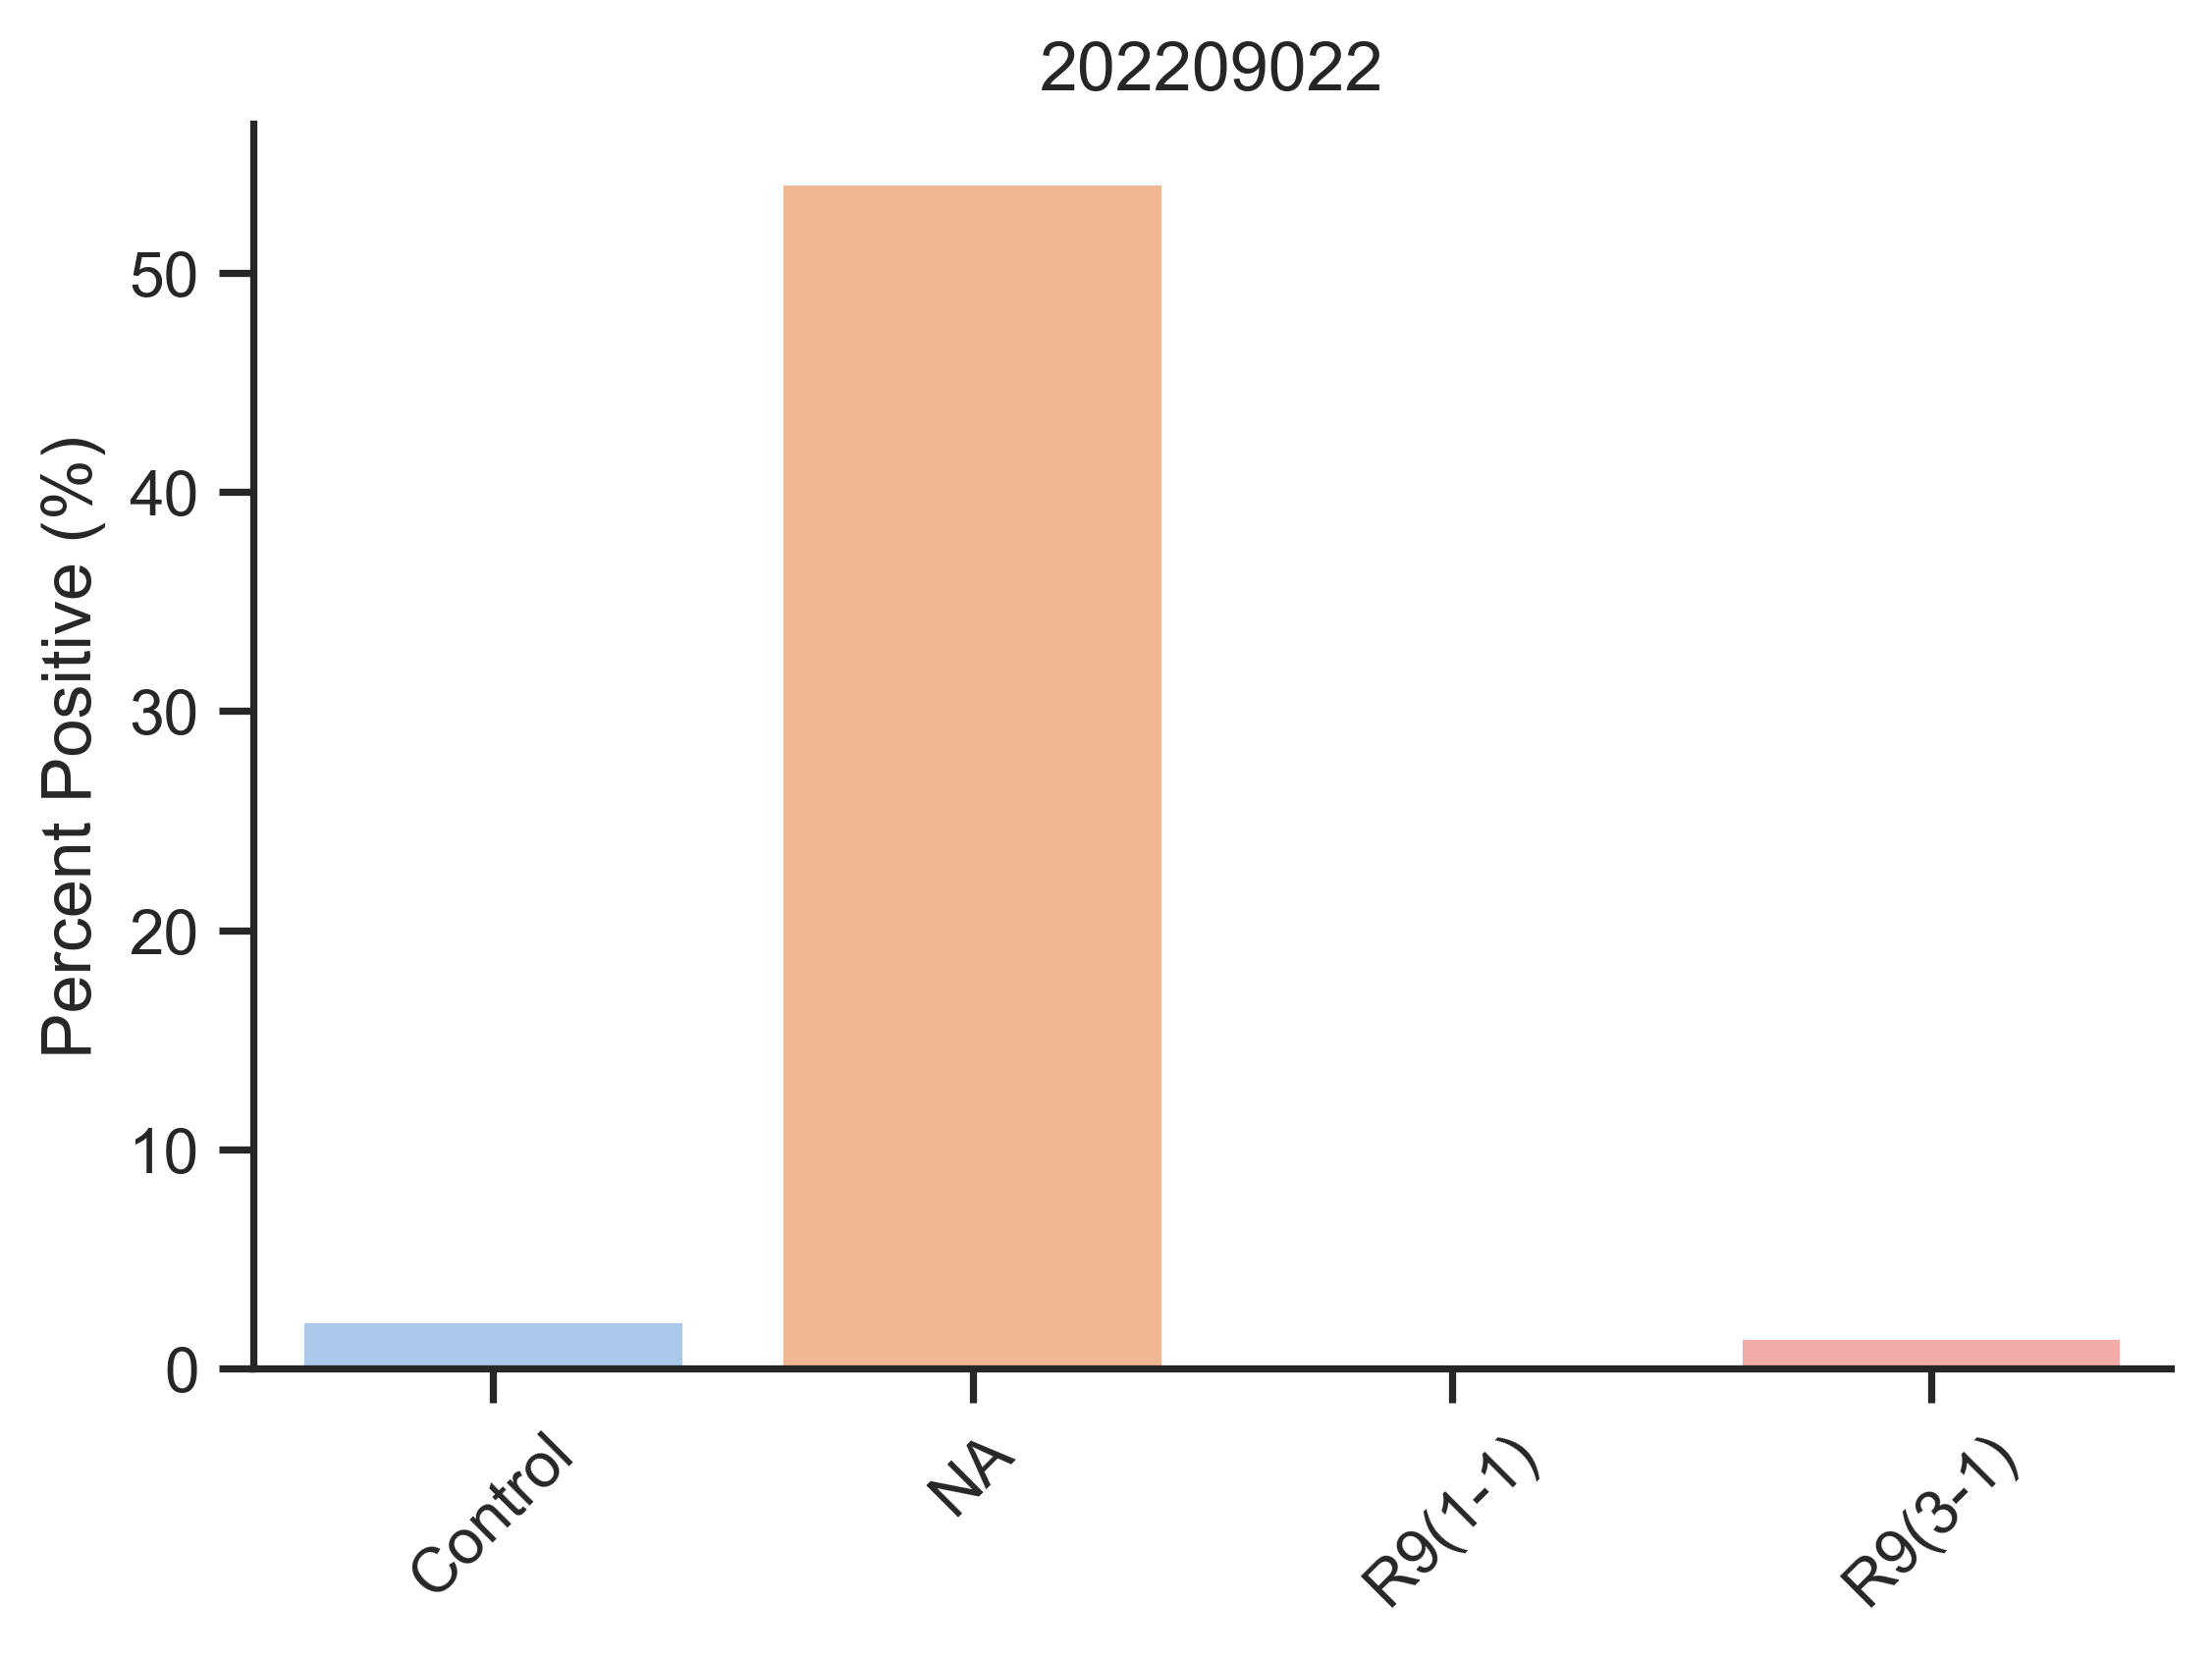

In [26]:
#plot this data as a check
sns.barplot(x=percent.keys(), y = percent[percent.keys()], order = axorder,palette = 'pastel')
sns.set_style("ticks")
sns.despine()
plt.xticks(rotation= '45')
plt.ylabel('Percent Positive (%)')
plt.title(date)
plt.show()

# DO NOT RUN UNTIL YOU SET UP THE REPLICATES

In [29]:
#don't run until you've set up the replicates


# % Positive
apl0=pd.DataFrame(percentRepeats)
finalAPL0 = apl0.transpose()
meltedapl0=finalAPL0.melt(ignore_index= False)
meltedapl0 = meltedapl0.rename({"variable":metadataname, "value":"Positive"}, axis="columns")

apl1=pd.DataFrame(normalizedpercentRepeats)
finalAPL1 = apl1.transpose()
meltedapl1=finalAPL1.melt(ignore_index= False)
meltedapl1 = meltedapl1.rename({"variable":metadataname, "value":"normPositive"}, axis="columns")


#mean
apl4=pd.DataFrame(intensityMeanRepeats)
finalAPL4 = apl4.transpose()
meltedapl4=finalAPL4.melt(ignore_index= False)
meltedapl4 = meltedapl4.rename({"variable":metadataname, "value":"Mean"}, axis="columns")

apl5=pd.DataFrame(normalizedintensityMeanRepeats)
finalAPL5 = apl5.transpose()
meltedapl5=finalAPL5.melt(ignore_index= False)
meltedapl5 = meltedapl5.rename({"variable":metadataname, "value":"normMean"}, axis="columns")




          Metadata_Cotreatment    Median
20220909               Control  0.031414
20220916               Control  0.033869
202209022              Control  0.036455
20220909                    NA  0.049642
20220916                    NA  0.119560
202209022                   NA  0.104235
20220909               R9(1-1)  0.033695
20220916               R9(1-1)  0.034309
202209022              R9(1-1)  0.026042
20220909               R9(3-1)  0.028350
20220916               R9(3-1)  0.028744
202209022              R9(3-1)  0.034085
          Metadata_Cotreatment  normMedian
20220909               Control    0.632816
20220916               Control    0.283278
202209022              Control    0.349733
20220909                    NA    1.000000
20220916                    NA    1.000000
202209022                   NA    1.000000
20220909               R9(1-1)    0.678766
20220916               R9(1-1)    0.286963
202209022              R9(1-1)    0.249842
20220909               R9(3-1)    0.5

In [30]:
savename = '' #what do you want to save the data as?

In [31]:
#save meltedapl to a csv for plotting in Prism



meltedapl0.to_csv('G:/My Drive/Good Imaging Data/CSV/Summary/Labeled Better/' + savename +' Percent Positive.csv' )
meltedapl1.to_csv('G:/My Drive/Good Imaging Data/CSV/Summary/Labeled Better/' + savename+' normalized Perecent Positive' +'.csv' )

meltedapl4.to_csv('G:/My Drive/Good Imaging Data/CSV/Summary/Labeled Better/' + savename +' Intensity Mean.csv' )
meltedapl5.to_csv('G:/My Drive/Good Imaging Data/CSV/Summary/Labeled Better/' + savename+' normalized Intensity Mean' +'.csv' )

